In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans,DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
df = pd.read_csv('dataset_compeleted.csv')

In [16]:
df

Unnamed: 0         0         1         2         3         4         5  \
0               0  4.713027  0.303659 -1.520996 -2.649384 -4.748433 -2.791299   
1               1 -0.250512  0.321898 -3.080862  0.270779 -0.588503 -2.777748   
2               2 -3.662608 -1.633456  0.131234 -1.954534 -2.520282  0.743767   
3               3 -6.970000  2.611901  5.553123 -1.422814  0.302027 -6.456426   
4               4  4.014448 -0.615780 -4.534494 -0.597996  1.093830 -0.537512   
...           ...       ...       ...       ...       ...       ...       ...   
20003       20003  0.664992 -4.403240 -0.223818 -1.706425 -0.967190 -1.255310   
20004       20004 -0.843599  2.369798 -2.418440 -2.608309  0.983410 -0.811622   
20005       20005 -1.477005  0.791341 -0.187597  1.173219  0.458349  2.226013   
20006       20006  5.003983 -0.520441 -1.988436 -0.816317 -0.150119 -1.434475   
20007       20007  5.038185  2.354243  1.815873 -0.976028 -2.948495  2.358093   

              6         7         8  ...        64        65        66  \
0     -1.178135  1.877169  0.646284  ...  0.654745 -0.528874 -2.049881   
1      0.232925 -1.018784 -1.959793  ...  0.358490  0.301547  1.119488   
2     -2.130190  0.758385  2.148837  ...  0.186229  0.045568  1.608644   
3     -1.355312 -1.374657  0.374630  ...  0.626027 -0.279711 -0.545047   
4      3.731216 -2.049699 -0.791670  ... -0.305939 -0.293963  0.198323   
...         ...       ...       ...  ...       ...       ...       ...   
20003 -2.320269  1.916666  2.063349  ... -0.249960  0.367324 -1.116763   
20004  3.229819  1.761767 -2.342840  ... -0.890094  1.189635 -0.835786   
20005  1.783005 -2.365361 -0.202012  ... -1.630806 -0.402483 -0.406026   
20006  2.181905 -2.691224 -2.350307  ... -0.354341  0.987206 -0.574668   
20007 -1.303592  0.249163 -1.796645  ... -1.020935  0.424360 -0.107216   

             67        68        69        70        71        72        73  
0     -0.500649 -1.092753  0.473052  0.281890  2.272300 -0.007309  0.288650  
1     -0.365168  1.554558  0.221262  0.233800  0.352449 -0.796417  0.198750  
2      0.344754  0.248578  0.158254  0.763958  0.419740  0.095084 -0.203762  
3      0.784883  0.085291 -0.073282 -0.902211 -0.929606  0.338915 -0.240549  
4      0.814433 -0.170572 -0.607656  0.602288 -0.036614  0.007840 -0.197542  
...         ...       ...       ...       ...       ...       ...       ...  
20003 -0.519628 -0.164568 -0.382194  0.345582  0.301212 -0.470775  0.931190  
20004  1.309319 -0.179695 -0.359282 -0.600136  0.068882  0.144967 -0.013314  
20005  0.416189 -0.835815  0.443322  0.555827  0.551654  0.449287  0.828084  
20006 -0.735809  0.002180 -0.936409  1.294132  0.233327  0.000005  0.136436  
20007  0.746630 -0.327670  0.214282  0.240155  0.276638 -0.519576 -0.143168  

[20008 rows x 75 columns]

In [17]:

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df)

In [19]:
tsne_result

array([[-111.64265 ,  -44.357464],
       [-111.72962 ,  -44.252357],
       [-111.690254,  -44.223186],
       ...,
       [ 129.63445 ,  -29.54704 ],
       [ 129.7507  ,  -29.54309 ],
       [ 129.69212 ,  -29.562243]], dtype=float32)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

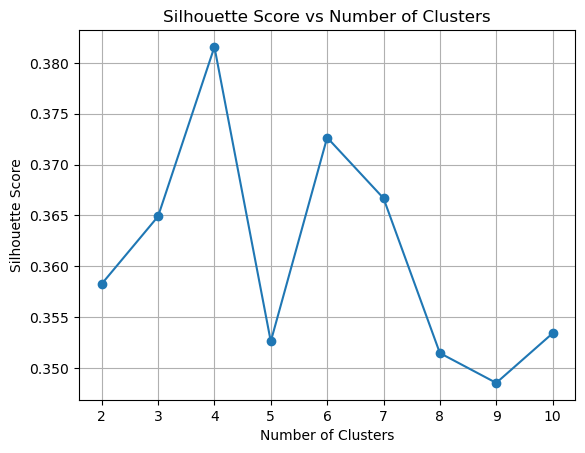

In [9]:
#Определение оптимального количества кластеров
silhouette_scores = []


min_clusters = 2
max_clusters = 10


for n_clusters in range(min_clusters, max_clusters+1):

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(tsne_result)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(tsne_result, cluster_labels)
    silhouette_scores.append(silhouette_avg)


plt.plot(range(min_clusters, max_clusters+1), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid(True)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'KMeans Clustering')

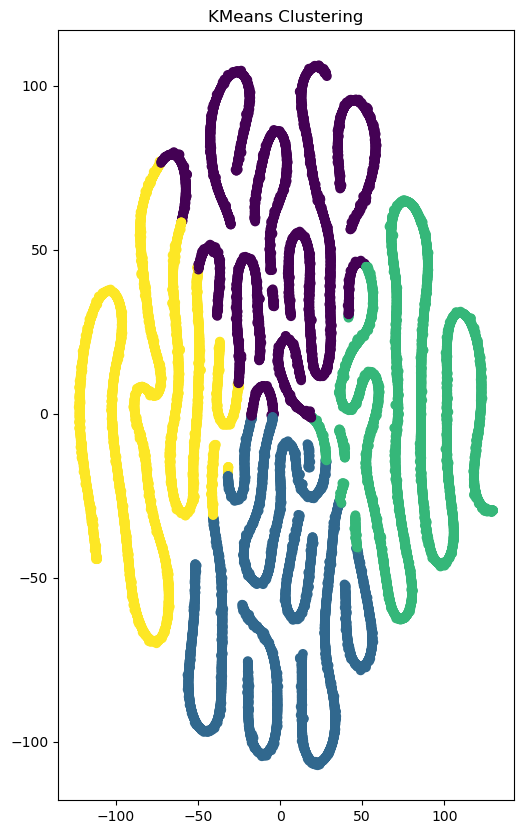

In [22]:
#K-means
kmeans = KMeans(n_clusters=4)
kmeans.fit(tsne_result)
df['KMeans_Clusters'] = kmeans.labels_


plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['KMeans_Clusters'], cmap='viridis')
plt.title('KMeans Clustering')



Text(0.5, 1.0, 'DBSCAN Clustering')

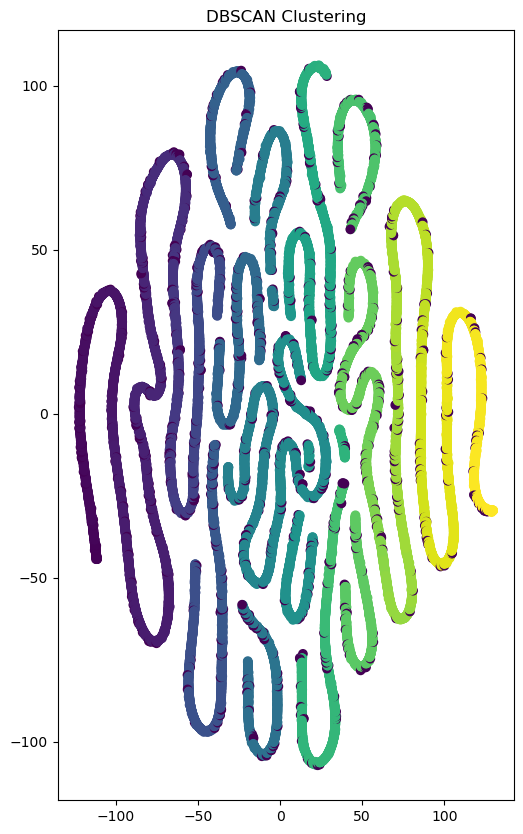

In [24]:
#DBSCAN 
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Clusters'] = dbscan.fit_predict(tsne_result)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['DBSCAN_Clusters'], cmap='viridis')
plt.title('DBSCAN Clustering')

Text(0.5, 1.0, 'Agglomerative Clustering')

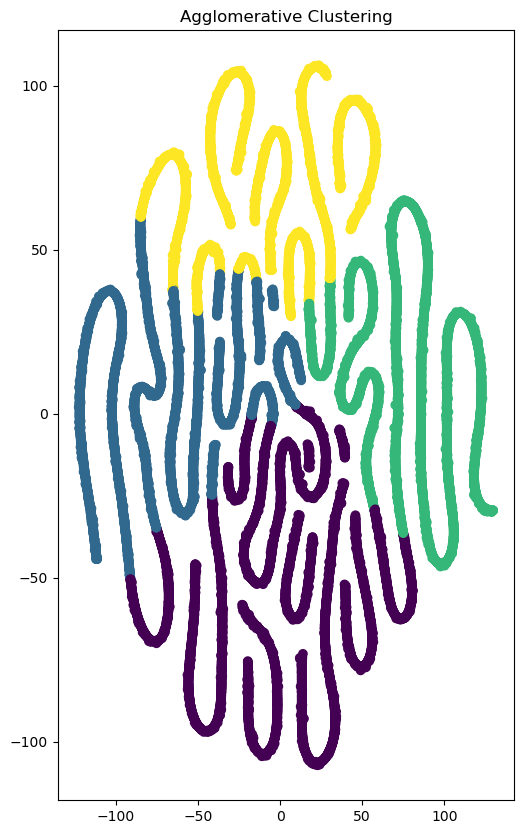

In [25]:
#Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=4)
df['Agglomerative_Clusters'] = agglomerative.fit_predict(tsne_result)

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 3)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['Agglomerative_Clusters'], cmap='viridis')
plt.title('Agglomerative Clustering')



In [23]:
plt.show()